<a href="https://www.kaggle.com/code/alirizaercan/web-scraping-imdb?scriptVersionId=226386112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMDB Top 250 Movies Web Scraper

## ⚠️ Important Note
This script currently retrieves only the first 25 movies instead of the full Top 250 list. This limitation occurs because:
1. IMDB's website uses JavaScript to dynamically load content
2. The `requests` library can only fetch the initial HTML response
3. JavaScript-loaded content is not accessible through simple HTTP requests
4. To get all 250 movies, you would need to use Selenium or similar tools that can execute JavaScript

This notebook demonstrates how to scrape a portion of the IMDB Top 250 movies list using Python, without requiring Selenium or ChromeDriver. We'll use the `requests` library for making HTTP requests and `BeautifulSoup4` for parsing HTML content.

## Limitations of this Approach
- Only retrieves first 25 movies
- Cannot access dynamically loaded content
- No access to JavaScript-rendered elements
- Limited to initial page load data

## Alternative Solutions
To get all 250 movies, you could:
1. Use Selenium WebDriver (recommended for full list)
2. Access IMDB's API (requires API key)
3. Use IMDbPY library
4. Target IMDB's mobile API endpoints


## Installation
First, let's install the required packages:

In [1]:
!pip install requests beautifulsoup4

## Import Required Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import time

## Define the Scraping Function

In [3]:
def scrape_imdb_top250():
    # Updated URL that shows all 250 movies
    url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Connection': 'keep-alive'
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Updated selector for the new IMDB layout
        movies = soup.find_all('li', class_='ipc-metadata-list-summary-item')
        print(f"Total movies found: {len(movies)}")
        
        if len(movies) < 250:
            print("Warning: Less than 250 movies found. IMDB might have updated their website structure.")
        
        csv_filename = "imdb_top250.csv"
        with open(csv_filename, mode='w', newline='', encoding='utf-8-sig') as file:
            writer = csv.writer(file)
            header = ['Rank', 'Name', 'Year', 'Rating', 'Viewers', 'Duration']
            writer.writerow(header)
            
            for movie in movies:
                try:
                    # Extract movie details with error handling
                    title_div = movie.find('div', class_='ipc-title')
                    if not title_div or not title_div.a:
                        continue
                        
                    full_title = title_div.a.text
                    rank = full_title.split('.')[0]
                    name = full_title.split('.')[1].strip() if len(full_title.split('.')) > 1 else full_title
                    
                    year_div = movie.find('div', class_='sc-d5ea4b9d-6')
                    year = year_div.span.text.strip('()') if year_div and year_div.span else 'N/A'
                    
                    rating_span = movie.find('span', class_='ipc-rating-star--rating')
                    rating = rating_span.text.strip() if rating_span else 'N/A'
                    
                    viewers_span = movie.find('span', class_='ipc-rating-star--voteCount')
                    viewers = viewers_span.text.replace('(', '').replace(')', '').strip() if viewers_span else 'N/A'
                    
                    metadata_items = movie.find_all('span', class_='sc-d5ea4b9d-7')
                    duration = next((item.text.strip() for item in metadata_items if 'h' in item.text or 'm' in item.text), 'N/A')
                    
                    writer.writerow([rank, name, year, rating, viewers, duration])
                    
                except AttributeError as e:
                    print(f"Error processing movie {rank if 'rank' in locals() else 'unknown'}: {e}")
                    continue
                
                time.sleep(0.1)
        
        print(f"Data successfully extracted and saved to {csv_filename}")
        
    except requests.RequestException as e:
        print(f"Error fetching data: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

## Run the Scraper

Now let's run the scraping function to collect the data:

In [4]:
if __name__ == "__main__":
    scrape_imdb_top250()

Total movies found: 25
Data successfully extracted and saved to imdb_top250.csv


## Reading the Results

You can view the collected data using pandas:

In [5]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('imdb_top250.csv')

# Display the first few rows
print("First 5 movies:")
display(df.head())

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())

First 5 movies:


,Rank,Name,Year,Rating,Viewers,Duration
0,1,The Shawshank Redemption,1994,9.3,3M,2h 22m
1,2,The Godfather,1972,9.2,2.1M,2h 55m
2,3,The Dark Knight,2008,9.0,3M,2h 32m
3,4,The Godfather Part II,1974,9.0,1.4M,3h 22m
4,5,12 Angry Men,1957,9.0,915K,1h 36m



Basic statistics:


,Rank,Year,Rating
count,25.000000,25.000000,25.000000
mean,13.000000,1988.440000,8.816000
std,7.359801,18.175258,0.195107
min,1.000000,1946.000000,8.600000
25%,7.000000,1975.000000,8.700000
50%,13.000000,1994.000000,8.800000
75%,19.000000,2001.000000,9.000000
max,25.000000,2014.000000,9.300000


## Working with the Scraped Data

After running the scraping script, you'll have a CSV file containing the movie data. Here's how to analyze and visualize your results:

### Basic Data Analysis


In [6]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('imdb_top250.csv')

# Display the first few rows
print("First 5 movies in the dataset:")
display(df.head())

# Get basic statistics
print("\nDataset Overview:")
display(df.describe())

# Check for missing values
print("\nMissing Values Check:")
display(df.isnull().sum())

First 5 movies in the dataset:


,Rank,Name,Year,Rating,Viewers,Duration
0,1,The Shawshank Redemption,1994,9.3,3M,2h 22m
1,2,The Godfather,1972,9.2,2.1M,2h 55m
2,3,The Dark Knight,2008,9.0,3M,2h 32m
3,4,The Godfather Part II,1974,9.0,1.4M,3h 22m
4,5,12 Angry Men,1957,9.0,915K,1h 36m



Dataset Overview:


,Rank,Year,Rating
count,25.000000,25.000000,25.000000
mean,13.000000,1988.440000,8.816000
std,7.359801,18.175258,0.195107
min,1.000000,1946.000000,8.600000
25%,7.000000,1975.000000,8.700000
50%,13.000000,1994.000000,8.800000
75%,19.000000,2001.000000,9.000000
max,25.000000,2014.000000,9.300000



Missing Values Check:


Rank        0
Name        0
Year        0
Rating      0
Viewers     0
Duration    0
dtype: int64

### Data Insights
You can perform various analyses on the collected data:

In [7]:
# Calculate average rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Find top 10 oldest movies
oldest_movies = df.sort_values('Year').head(10)
print("\nTop 10 Oldest Movies:")
display(oldest_movies[['Name', 'Year', 'Rating']])

# Distribution of movies by decade
df['Decade'] = (df['Year'].astype(int) // 10) * 10
decade_distribution = df['Decade'].value_counts().sort_index()
print("\nMovies per Decade:")
display(decade_distribution)

Average Rating: 8.82

Top 10 Oldest Movies:


,Name,Year,Rating
20,It's a Wonderful Life,1946,8.6
21,Seven Samurai,1954,8.6
4,12 Angry Men,1957,9.0
9,"The Good, the Bad and the Ugly",1966,8.8
1,The Godfather,1972,9.2
3,The Godfather Part II,1974,9.0
17,One Flew Over the Cuckoo's Nest,1975,8.7
14,Star Wars: Episode V - The Empire Strikes Back,1980,8.7
16,Goodfellas,1990,8.7
22,The Silence of the Lambs,1991,8.6



Movies per Decade:


Decade
1940     1
1950     2
1960     1
1970     3
1980     1
1990    10
2000     5
2010     2
Name: count, dtype: int64

### Visualization Examples
You can create visualizations using libraries like matplotlib or seaborn:

/tmp/ipykernel_17/1810453145.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


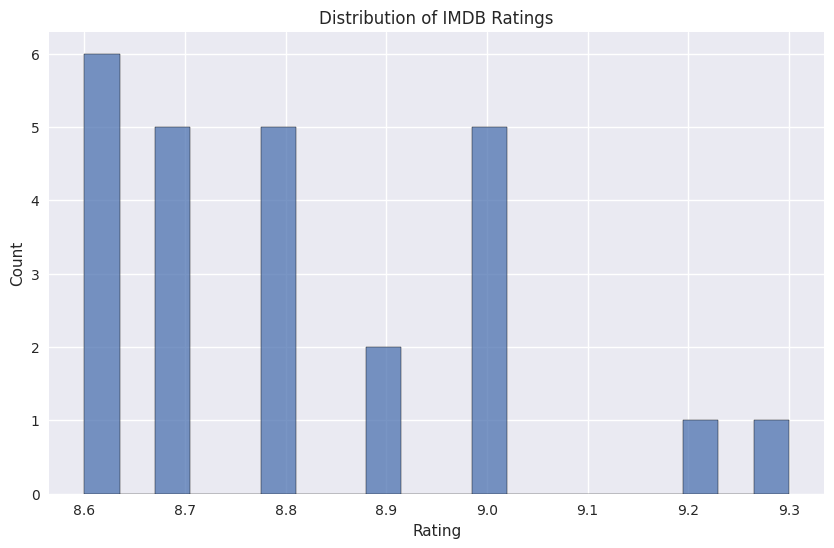

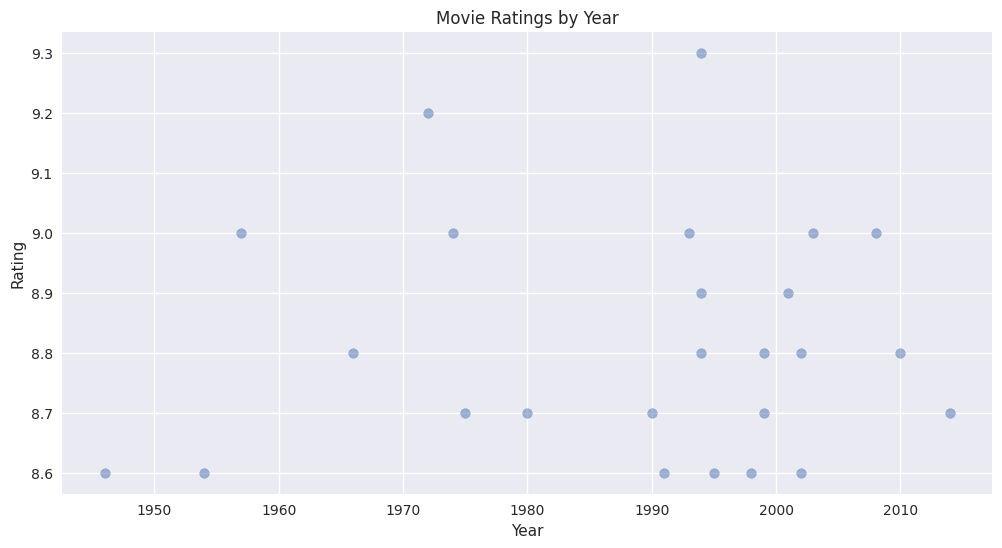

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn')

# Create a rating distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Create a year vs rating scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Rating'], alpha=0.5)
plt.title('Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


### Data Export Options
You can export your analyzed data in various formats:

In [9]:
# Export to Excel with multiple sheets
with pd.ExcelWriter('imdb_analysis.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw Data')
    decade_distribution.to_excel(writer, sheet_name='Decade Analysis')
    oldest_movies.to_excel(writer, sheet_name='Oldest Movies')

# Export specific analysis to CSV
top_rated = df[df['Rating'] >= 8.5]
top_rated.to_csv('top_rated_movies.csv', index=False)

### Next Steps
With this data, you can:
1. Perform more advanced statistical analysis
2. Create interactive visualizations using Plotly or Bokeh
3. Build a recommendation system based on ratings
4. Analyze trends in movie durations over time
5. Study the correlation between ratings and number of viewers


### Note on Data Limitations
Remember that this dataset only contains the first 25 movies due to the limitations of using `requests`. For a complete analysis of all 250 movies, consider implementing one of the alternative scraping methods mentioned earlier in the documentation.

### Data Maintenance
To keep your dataset up-to-date:
- Schedule regular runs of the scraper
- Implement version control for your dataset
- Monitor for changes in IMDB's website structure
- Keep track of data quality metrics

This structured approach to data analysis will help you extract meaningful insights from your scraped IMDB data and maintain its quality over time.